# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=' + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad lazaro cardenas
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | tres arroyos
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | north bend
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | fale old settlement
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | port macquarie
Processing Record 20 of Set 1 | zhanibek
Processing Record 21 of Set 1 | k

Processing Record 37 of Set 4 | timmins
Processing Record 38 of Set 4 | vilyuysk
Processing Record 39 of Set 4 | shiguai
Processing Record 40 of Set 4 | villa la angostura
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | belyy yar
Processing Record 43 of Set 4 | porto novo
Processing Record 44 of Set 4 | castillos
Processing Record 45 of Set 4 | nantong
Processing Record 46 of Set 4 | nuuk
Processing Record 47 of Set 4 | makokou
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | port saint john's
Processing Record 0 of Set 5 | mweka
Processing Record 1 of Set 5 | santa ponsa
Processing Record 2 of Set 5 | takhatgarh
Processing Record 3 of Set 5 | okhotsk
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | tawau
Processing Record 6 of Set 5 | brezina
Processing Record 7 of Set 5 | st. john's
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | karak city
Processing Record 10 of Set 5 | ancud
Processing Record 1

Processing Record 28 of Set 8 | lubang
Processing Record 29 of Set 8 | luderitz
Processing Record 30 of Set 8 | langzhong
Processing Record 31 of Set 8 | narrabri
Processing Record 32 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 33 of Set 8 | aqsay
Processing Record 34 of Set 8 | crotone
Processing Record 35 of Set 8 | mocorito
Processing Record 36 of Set 8 | suva
Processing Record 37 of Set 8 | lukow
Processing Record 38 of Set 8 | tamanrasset
Processing Record 39 of Set 8 | tayu
Processing Record 40 of Set 8 | mandera
Processing Record 41 of Set 8 | tralee
Processing Record 42 of Set 8 | labrador city
Processing Record 43 of Set 8 | bulawayo
Processing Record 44 of Set 8 | kyren
Processing Record 45 of Set 8 | guglingen
Processing Record 46 of Set 8 | turpan
Processing Record 47 of Set 8 | rikaze
Processing Record 48 of Set 8 | madalena
Processing Record 49 of Set 8 | cloquet
Processing Record 0 of Set 9 | chicxulub puerto
City not found. Skipping...
Proc

Processing Record 16 of Set 12 | hobyo
Processing Record 17 of Set 12 | aquiraz
Processing Record 18 of Set 12 | amguri
Processing Record 19 of Set 12 | dunedin
Processing Record 20 of Set 12 | punta del este
Processing Record 21 of Set 12 | muang phonsavan
Processing Record 22 of Set 12 | souillac
Processing Record 23 of Set 12 | altai
Processing Record 24 of Set 12 | el granada
Processing Record 25 of Set 12 | bel ombre
Processing Record 26 of Set 12 | undurkhaan
Processing Record 27 of Set 12 | gaspe
Processing Record 28 of Set 12 | kavaratti
Processing Record 29 of Set 12 | majorna
Processing Record 30 of Set 12 | newnan
Processing Record 31 of Set 12 | itamaraca
Processing Record 32 of Set 12 | bondo
Processing Record 33 of Set 12 | garoowe
Processing Record 34 of Set 12 | halifax
Processing Record 35 of Set 12 | rustaq
Processing Record 36 of Set 12 | camlachie
Processing Record 37 of Set 12 | guercif
Processing Record 38 of Set 12 | kulhudhuffushi
Processing Record 39 of Set 12 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ciudad lazaro cardenas,17.9583,-102.2000,31.42,66,83,5.68,MX,1689890272
1,papatowai,-46.5619,169.4708,5.97,69,10,8.75,NZ,1689890273
2,hamilton,39.1834,-84.5333,31.06,69,40,4.63,US,1689889590
3,margaret river,-33.9500,115.0667,14.67,68,30,8.52,AU,1689890273
4,port-aux-francais,-49.3500,70.2167,1.74,51,75,16.94,TF,1689890274


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,31.42,66,83,5.68,MX,1689890272
1,papatowai,-46.5619,169.4708,5.97,69,10,8.75,NZ,1689890273
2,hamilton,39.1834,-84.5333,31.06,69,40,4.63,US,1689889590
3,margaret river,-33.9500,115.0667,14.67,68,30,8.52,AU,1689890273
4,port-aux-francais,-49.3500,70.2167,1.74,51,75,16.94,TF,1689890274


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

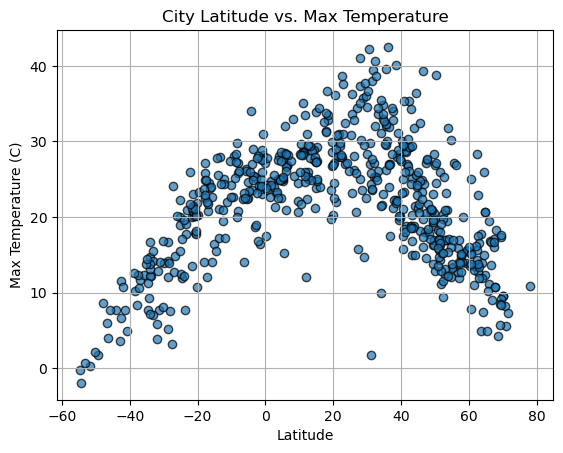

In [11]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

plt.scatter(lat, max_temp, c = 'tab:blue', alpha = 0.7, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

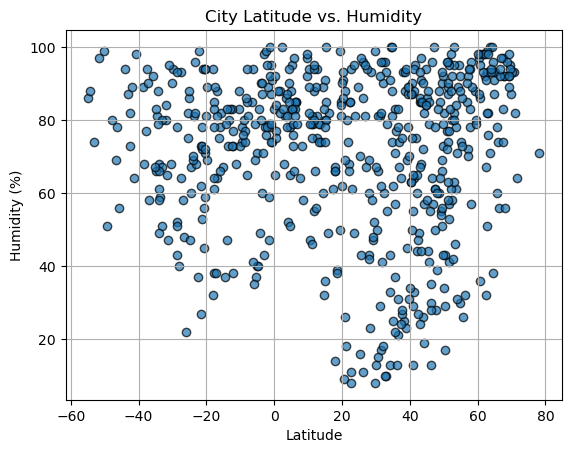

In [12]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

plt.scatter(lat, humidity, c = 'tab:blue', alpha = 0.7, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

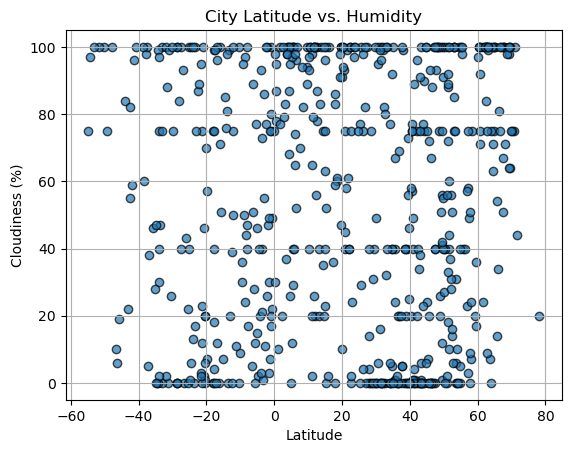

In [13]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

plt.scatter(lat, cloudiness, c = 'tab:blue', alpha = 0.7, edgecolors = 'black')

# Incorporate the other graph Cloudiness
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

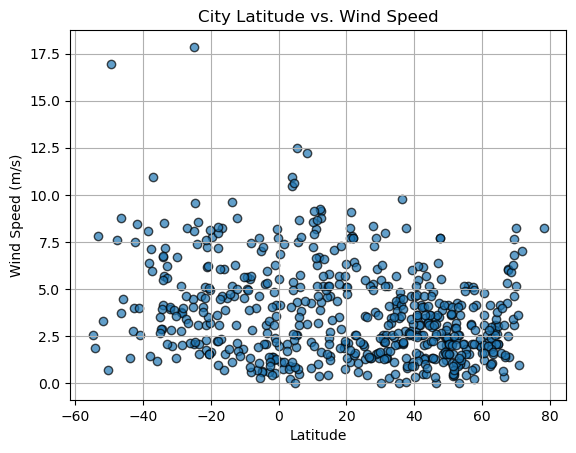

In [14]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']

plt.scatter(lat, wind_speed, c = 'tab:blue', alpha = 0.7, edgecolors = 'black')

# Incorporate the other graph Cloudiness
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def lin_reg_plots(x, y):
    
    # perform linear regression on latitude and other metrics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # get regression values
    regress_vals = (x * slope) + intercept
    
    # create line equation string
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    
    # Create Plot
    plt.scatter(x, y)
    plt.ylabel(y.name)
    plt.xlabel(x.name)

    # Label plot and annotate the line equation
    plt.annotate(line_eq, xy = (min(x),min(y)), fontsize = 10, color = 'red')

    # Print r value
    plt.plot(x, regress_vals, '-r')
    print(f'The r value is: {rvalue}.')
    
    # Show plot
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,31.42,66,83,5.68,MX,1689890272
2,hamilton,39.1834,-84.5333,31.06,69,40,4.63,US,1689889590
9,north bend,43.4065,-124.2243,25.13,68,100,5.66,US,1689890275
13,albany,42.6001,-73.9662,29.24,49,34,0.45,US,1689889798
16,udachny,66.4167,112.4000,16.80,56,81,0.31,RU,1689890277


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,5.97,69,10,8.75,NZ,1689890273
3,margaret river,-33.9500,115.0667,14.67,68,30,8.52,AU,1689890273
4,port-aux-francais,-49.3500,70.2167,1.74,51,75,16.94,TF,1689890274
5,avarua,-21.2078,-159.7750,23.03,53,75,6.17,CK,1689890274
6,tres arroyos,-38.3739,-60.2798,10.24,68,60,6.37,AR,1689890274


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.5683399209800518.


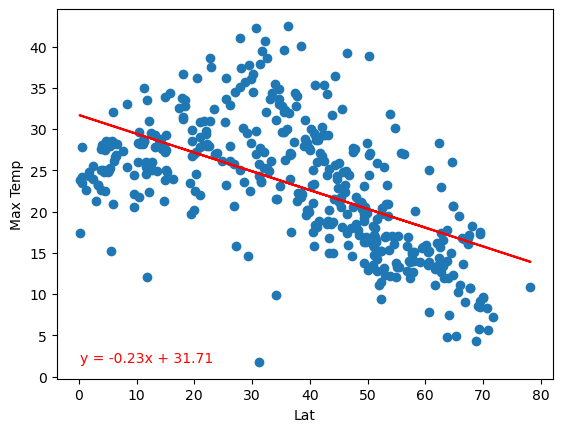

In [27]:
# Linear regression on Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r value is: 0.8481796740146401.


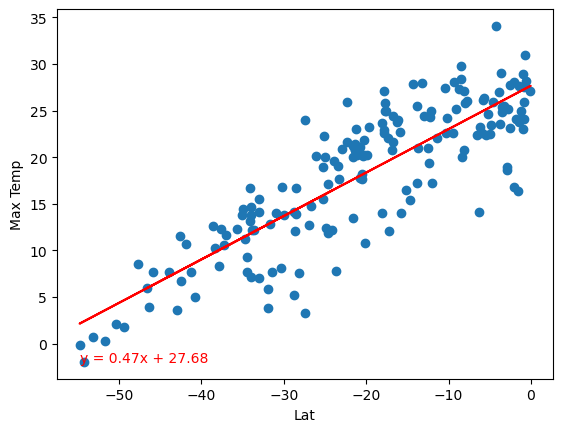

In [28]:
# Linear regression on Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** 
In the southern hemisphere, the temperature has a positive linear relationship between the temperature and latitude. As the latitude increases, the temperture also increases. The r value suggests that there is a strong postive correlation between the temperature and latitude in the southern hemisphere. Because of this, you could be somewhat confident that you can predict the temperature in the southern hemisphere using the regression equation. 

In contrast, the northern hemisphere has shows a negative linear relationship between the temperature and latitude. As the latitude increases, the temperature decreases. The correlation value r for the northern hemisphere suggests a low positive correlation. There is less confidence that the regression equation could predicy the temperature given a particular latitude in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.05294650390615024.


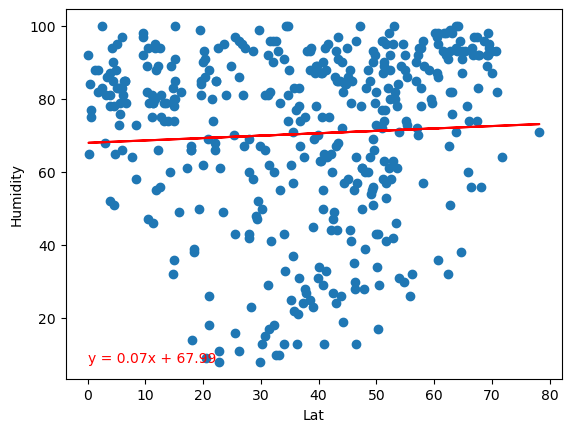

In [29]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r value is: -0.015319000639513535.


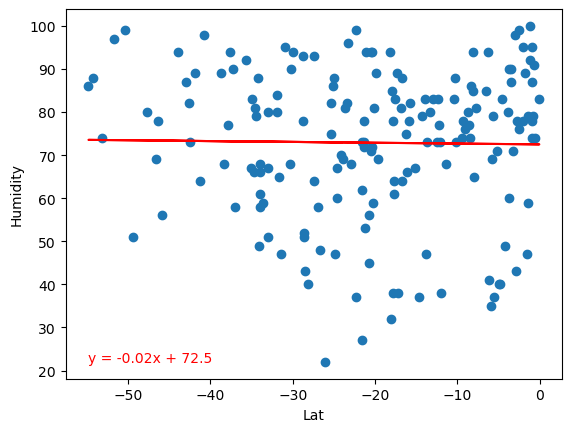

In [30]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** The results suggest that there is no strong correlation between the humidity and latitude. The regression equation would not be a good equation to use to predict the humidity of a region given the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.07592109364030254.


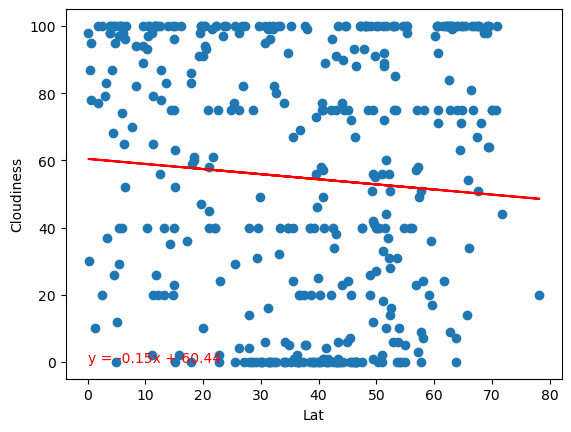

In [31]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r value is: -0.14624674591447026.


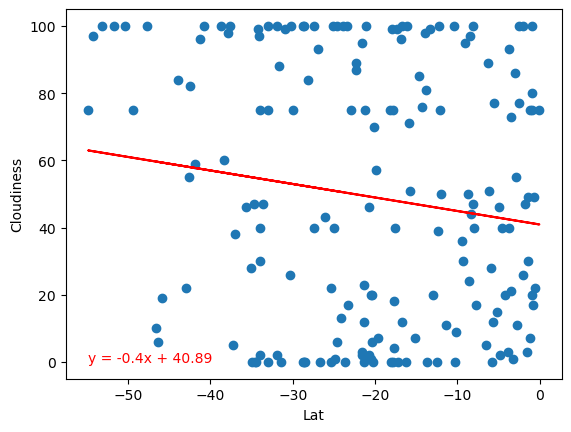

In [32]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The results suggest that there is no strong correlation between the cloudiness and latitude. The regression equation would not be a good equation to use to predict the cloudiness of a region given the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.2363661046739856.


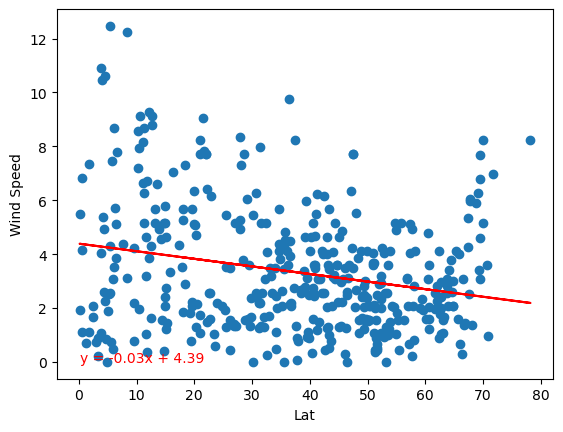

In [33]:
# Northern Hemisphere
lin_reg_plots(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r value is: -0.23011247797248058.


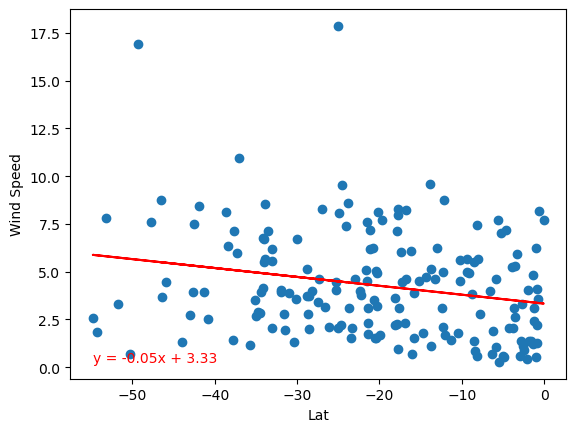

In [34]:
# Southern Hemisphere
lin_reg_plots(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** The results suggest that there is no strong correlation between the wind speed and latitude. The regression equation would not be a good equation to use to predict the wind speed of a region given the latitude.